In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Train dataset

In [2]:
data_train = pd.read_csv(r'C:\Users\user\Downloads\train_ctrUa4K.csv')

In [3]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2. Load the test dataset

In [4]:
data_test = pd.read_csv(r'C:\Users\user\Downloads\test_lAUu6dG.csv')

In [5]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# 3. Check the basic details and do the preprocessing on train data

In [6]:
data_train.shape

(614, 13)

In [7]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 3a. Handle the missing values (if any)

In [8]:
data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
for column in ['Gender', 'Married', 'Dependents','Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']:
    if column == 'Gender':
        data_train[column] = data_train[column].fillna(data_train[column].mode()[0])
    elif column == 'Married':
        data_train[column] = data_train[column].fillna(data_train[column].mode()[0])
    elif column == 'Dependents':
        data_train[column] = data_train[column].fillna(data_train[column].mode()[0])
    elif column == 'Self_Employed':
        data_train[column] = data_train[column].fillna(data_train[column].mode()[0])
    elif column == 'LoanAmount':
        data_train[column] = data_train[column].fillna(data_train[column].mean())
    elif column == 'Loan_Amount_Term':
        data_train[column] = data_train[column].fillna(data_train[column].mean())
    elif column == 'Credit_History':
        data_train[column] = data_train[column].fillna(data_train[column].mean())

In [11]:
data_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 3b. Perform Encoding

In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [13]:
columns_to_encode = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']

In [14]:
data_train[columns_to_encode] = encoder.fit_transform(data_train[columns_to_encode])

In [15]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


# 3c. Perform Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))

In [17]:
x = data_train.drop(['Loan_Status'],axis = 1)
y = data_train['Loan_Status']

In [18]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0


In [19]:
x = min_max.fit_transform(x)

In [20]:
type(x)

numpy.ndarray

In [21]:
x = pd.DataFrame(x)

In [22]:
type(x)

pandas.core.frame.DataFrame

In [23]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [24]:
x.columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [25]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [26]:
data_train.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis = 1,inplace = True)

In [27]:
data_train.head()

,Loan_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [28]:
data_train_1 = pd.concat([x,data_train],axis =1)

In [29]:
data_train_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.001631,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.003263,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.004894,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.006525,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [30]:
data_train_1['Loan_Status'].nunique()

2

# 4. Check the basic details and do the preprocessing on test data

In [31]:
data_test.shape

(367, 12)

In [32]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# 4a. Handle the missing values (if any)

In [33]:
data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [34]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
for column in ['Gender', 'Dependents','Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']:
    if column == 'Gender':
        data_test[column] = data_test[column].fillna(data_test[column].mode()[0])
    elif column == 'Dependents':
        data_test[column] = data_test[column].fillna(data_test[column].mode()[0])
    elif column == 'Self_Employed':
        data_test[column] = data_test[column].fillna(data_test[column].mode()[0])
    elif column == 'LoanAmount':
        data_test[column] = data_test[column].fillna(data_test[column].mean())
    elif column == 'Loan_Amount_Term':
        data_test[column] = data_test[column].fillna(data_test[column].mean())
    elif column == 'Credit_History':
        data_test[column] = data_test[column].fillna(data_test[column].mean())

In [36]:
data_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# 4b. Perform Encoding

In [37]:
columns_to_encode_1 = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

In [38]:
data_test[columns_to_encode_1] = encoder.fit_transform(data_test[columns_to_encode_1])

In [39]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,1.0,0.0,0.0,0.0,5720,0,110.0,360.0,1.000000,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,3076,1500,126.0,360.0,1.000000,2.0
2,2.0,1.0,1.0,2.0,0.0,0.0,5000,1800,208.0,360.0,1.000000,2.0
3,3.0,1.0,1.0,2.0,0.0,0.0,2340,2546,100.0,360.0,0.825444,2.0
4,4.0,1.0,0.0,0.0,1.0,0.0,3276,0,78.0,360.0,1.000000,2.0


# 4c. Perform Scaling

In [40]:
data_test = min_max.fit_transform(data_test)

In [41]:
type(data_test)

numpy.ndarray

In [42]:
data_test = pd.DataFrame(data_test)

In [43]:
type(data_test)

pandas.core.frame.DataFrame

In [44]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.000000,1.0
1,0.002732,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.000000,1.0
2,0.005464,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.000000,1.0
3,0.008197,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,0.825444,1.0
4,0.010929,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.000000,1.0


In [45]:
data_test.columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [46]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.000000,1.0
1,0.002732,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.000000,1.0
2,0.005464,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.000000,1.0
3,0.008197,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,0.825444,1.0
4,0.010929,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.000000,1.0


# Since this is a Classification prolem we can use Classification algorithms to train it.

# 5. Train the Logistic Regression algotithm

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Separate input features and target variable in the train data

In [48]:
X_train = data_train_1.drop('Loan_Status', axis=1)
y_train = data_train_1['Loan_Status']

In [49]:
model = lr.fit(X_train, y_train)

# 6. Test and evaluate Logistic Regression algorithm

In [50]:
X_test = data_test

In [51]:
y_prediction = model.predict(X_test)

In [52]:
y_prediction

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

# Retrieve the target values from the sample submission file

In [53]:
sample_submission = pd.read_csv(r'C:\Users\user\Downloads\sample_submission_49d68Cx.csv')

In [54]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [55]:
sample_submission.shape

(367, 2)

In [56]:
sample_submission.isna().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

# Perform Encoding on sample_submission

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
sample_submission['Loan_Status'] = le.fit_transform(sample_submission['Loan_Status'])

In [59]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0


In [60]:
y_test = sample_submission['Loan_Status']

# Evaluate the model's performance on the test set

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
lr_accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy of Logistic Regression model is ', lr_accuracy)

Accuracy of Logistic Regression model is  0.16076294277929154


# 7. Train, Test and Evaluate kNN algorithm

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
metric_k = []
neighbors = np.arange(3,15)

In [65]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(X_train, y_train)
    y_prediction1 = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_prediction1)
    metric_k.append(acc)

# Plot metric_k to find the most accuracy k

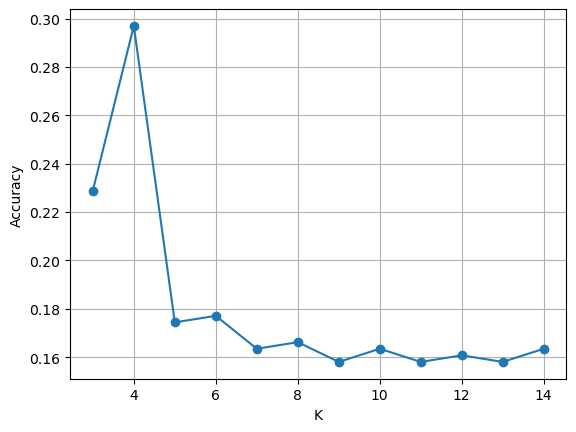

In [66]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
classifier.fit(X_train, y_train)
y_prediction1 = classifier.predict(X_test)
print('Accuracy of KNN model is ', accuracy_score(y_test,y_prediction1))

Accuracy of KNN model is  0.2970027247956403


# 8. Train, Test and Evaluate SVM algorithm

In [68]:
from sklearn.svm import SVC

In [69]:
svm_clf = SVC(kernel = 'linear')

In [70]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
y_prediction2 = svm_clf.predict(X_test)

In [72]:
print('Accuracy of SVM model is ', accuracy_score(y_test, y_prediction2))

Accuracy of SVM model is  0.16076294277929154


# 9. Train, Test and Evaluate Decision Tree algorithm

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_clf = DecisionTreeClassifier()

In [75]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
y_prediction3 = dt_clf.predict(X_test)
print('Accuracy of decision tree model is ', accuracy_score(y_test,y_prediction3))

Accuracy of decision tree model is  0.335149863760218


# 10. Train, Test and Evaluate Random Forest algorihm

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_clf = RandomForestClassifier()

In [79]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
y_prediction4 = rf_clf.predict(X_test)
print('Accuracy of random forest model is ', accuracy_score(y_test, y_prediction4))

Accuracy of random forest model is  0.1907356948228883


# Let's add some hyperparameters

In [81]:
rf_clf1 = RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy',min_samples_split = 3)

In [82]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [83]:
y_prediction5 = rf_clf1.predict(X_test)
print('Accuracy is ', accuracy_score(y_test, y_prediction5))

Accuracy is  0.19618528610354224


# 11. Update the sample submission file

# Since the accuracy is more in decision tree model compared to other models use it's predicted values to replace target feature in sample_submission

# Convert predictions to "Yes" and "No"

In [84]:
y_pred_labels = ['Y' if pred == 1 else 'N' for pred in y_prediction3]

In [85]:
submission1 = sample_submission.copy()
submission1['Loan_Status'] = y_pred_labels

# 12. Save the updated submission file as a CSV

In [86]:
submission1.to_csv(r'C:\Users\user\Downloads\submission1.csv', index=False)